<a href="https://colab.research.google.com/github/sachinprabhu007/ML-Expriments/blob/master/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('./data',one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/mo

In [9]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples

print('MNIST datasize: training samples : %d, testing samples : %d, vaidation samples: %d' %(num_training,num_testing,num_validation))


MNIST datasize: training samples : 55000, testing samples : 10000, vaidation samples: 5000


In [0]:
#network parameters of neural network

n_input = 784          #input image of size 28*28
n_hidden_1 = 512       #first hidden layer
n_hidden_2 = 256       #second hidden layer
n_hidden_3 = 128       #third hidden layer
n_output = 10          #output layer having (0-9) digits

In [0]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [0]:
#building a tensorflow graph

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

#weight definition

nn_weight = {'W1': tf.Variable(tf.truncated_normal([n_input,n_hidden_1], stddev=0.1)),
             'W2': tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2], stddev=0.1)),
             'W3': tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3], stddev=0.1)),
             'Wout': tf.Variable(tf.truncated_normal([n_hidden_3,n_output], stddev=0.1)),
            }

nn_bias = {'B1': tf.Variable(tf.truncated_normal([n_hidden_1])),
           'B2': tf.Variable(tf.truncated_normal([n_hidden_2])),
           'B3': tf.Variable(tf.truncated_normal([n_hidden_3])),
           'B4': tf.Variable(tf.truncated_normal([n_output])),
          }
            

In [0]:
#create a NN model

nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]), nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]), nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]), nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3,keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])




In [0]:
#Define the loss

computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)


#Define the prediction
prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

#Define the accuracy of the model

nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

#Initialize all the variables

init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [22]:
#Executing the computational graph

with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):
    
    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    
    #print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)
    
    sess.run(optimizer, feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})
    
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy],
                                                     
                                                     feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})
     
      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy],
                                                     
                                                     feed_dict = {X: mini_batch_val_x, Y: mini_batch_val_y, keep_prob:1})
  
      print('Iterations : {0}, Train_loss = {1}, Train_accuracy {2}, val_loss  {3}, val_accuracy {4}'
            .format(i, mini_batch_loss,mini_batch_accuracy, mini_batch_val_loss,mini_batch_val_accuracy)
            )
    
  print('optimization finished')
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X: mnist_data.test.images, Y: mnist_data.test.labels, keep_prob:1.0})
  
  print('testing accuracy is {0}'.format(test_accuracy))
  
  saver_path = saver.save(sess,'./model/my_model.ckpt')
     

Iterations : 0, Train_loss = 5.086050987243652, Train_accuracy 0.125, val_loss  5.109346389770508, val_accuracy 0.0703125
Iterations : 100, Train_loss = 3.099024534225464, Train_accuracy 0.1484375, val_loss  3.504246950149536, val_accuracy 0.1171875
Iterations : 200, Train_loss = 2.672011375427246, Train_accuracy 0.1953125, val_loss  2.666717529296875, val_accuracy 0.140625
Iterations : 300, Train_loss = 2.257397174835205, Train_accuracy 0.265625, val_loss  2.323563814163208, val_accuracy 0.2734375
Iterations : 400, Train_loss = 2.194329261779785, Train_accuracy 0.3125, val_loss  2.2007980346679688, val_accuracy 0.28125
Iterations : 500, Train_loss = 2.0997207164764404, Train_accuracy 0.3359375, val_loss  2.1702070236206055, val_accuracy 0.359375
Iterations : 600, Train_loss = 1.8370764255523682, Train_accuracy 0.4296875, val_loss  2.0449390411376953, val_accuracy 0.3046875
Iterations : 700, Train_loss = 1.6271510124206543, Train_accuracy 0.390625, val_loss  1.5541030168533325, val_acc

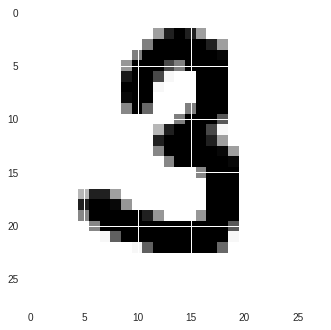

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
Prediction for test image is [2]


In [36]:
# upload the test image from outside

img = cv2.imread('example3.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
  
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1,-1)/255
dum.shape

with tf.Session() as sess:
  saver.restore(sess,'./model/my_model.ckpt')
  Z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis = 1)
  print('Prediction for test image is {0}'.format(y_pred))
  
  
  # fetch example.png from https://github.com/tensorflow/models/tree/master/official/mnist, upload the image to runtime from upload icon on left of colab and then run the cell
  